# Exploratory Data Analysis (EDA)

# Statistic

## Descriptive statistics

In [1]:
import pandas as pd
import statistics
import numpy as np

array_ = np.array([80, 83, 87, 92, 95, 98])
print('mean:', statistics.mean(array_))
print('median:', statistics.median(array_))
print('median_low:', statistics.median_low(array_))
print('median_high:', statistics.median_high(array_))

df = pd.read_csv('data/wine_cleared.csv')
print('mode:', statistics.mode(df['province']))         # Raise error if more than one
print('mode:', statistics.multimode(df['province']))    # Return list if more than one

mean: 89
median: 89.5
median_low: 87
median_high: 92
mode: California
mode: ['California']


## Multivariate analysis (Correlation)

Correlation coefficient | Correlation strength
---|---
-/+ (0 to 0.3) | Weak
-/+ (0.3 to 0.5) | Moderate
-/+ (0.5 to 0.7) | Strong
-/+ (0.7 to 1) | Very strong (***multicollinearity***)

In [2]:
import pandas as pd

df = pd.read_csv('data/wine_cleared.csv')

# For normal (Gaussian) distribution numeric features
df.corr(method='pearson')

,points,price
points,1.0000,0.4111
price,0.4111,1.0000


In [3]:
# For non-Gaussian and categorical features
df.corr(method='spearman')

,points,price
points,1.000000,0.580658
price,0.580658,1.000000


In [4]:
# For non-Gaussian and categorical features FOR NON-cleaned data
df.corr(method='kendall')

,points,price
points,1.000000,0.433066
price,0.433066,1.000000


In [5]:
from sklearn.metrics import matthews_corrcoef

# For boolean features (boolean is still categorical)
x = [+1, -1, +1, +1]
y = [+1, +1, +1, -1] 
matthews_corrcoef(x, y)

-0.3333333333333333

Пары признаков с корреляцией больше 0.3:
    price--points: корреляция 0.41
    points--price: корреляция 0.41
Визуализация всех корреляций:


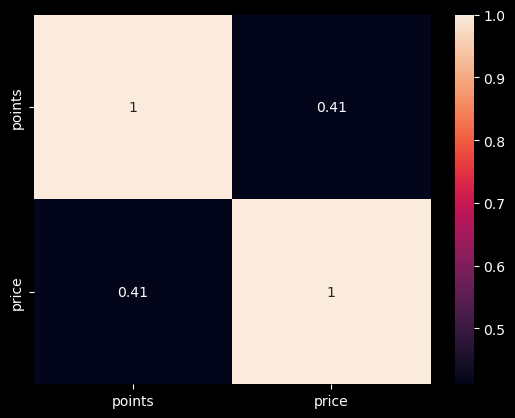

In [6]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/wine_cleared.csv')

def get_correlation(
    df: pd.DataFrame, cols_list: str, method='pearson', 
    multicorr_edge=0.7, heatmap=False):
    """Get the list of correlation

    Args:
        df (pd.DataFrame): The input DataFrame for analysis
        cols_list (str): The list of features in input DF to check correlation
        method (str, optional): Method used to compute correlation. Defaults to 'pearson'.
        multicorr_edge (float, optional): Multicollinearity edge (ME). Defaults to 0.7.
        heatmap (bool, optional): Draw heatmap. Defaults to False.
    """    
    
    df_corr = df[cols_list].corr(method=method)
    multicoll_cols = []
    annot=True
    
    # Pass through corr table
    for col in df_corr.columns:
        for i in range(len(df_corr)):
            if df_corr[col][i] == 1:
                continue
            elif df_corr[col][i] < -multicorr_edge or df_corr[col][i] > multicorr_edge:
                corr = round(df_corr[col][i], 2)
                multicoll_cols.append(f'{df_corr.index[i]}--{col}: correlation is {corr}')

    print(f'Pairs of features with correlation more than {multicorr_edge}:')
    if multicoll_cols:
        for corr in multicoll_cols:
            print(f'    {corr}')
    else:
        print('    no features with a given ME boundary were found')

    # Readability of heatmap
    if len(cols_list) > 15:
        annot=False

    if heatmap:
        if len(df_corr) > 0:
            print('Visualization of all correlations:')
            return sns.heatmap(df_corr, annot=annot)


num_cols = df.select_dtypes('number').columns
cat_cols = [col for col in df.columns if col not in num_cols]

get_correlation(df, num_cols, multicorr_edge=0.3, heatmap=True);

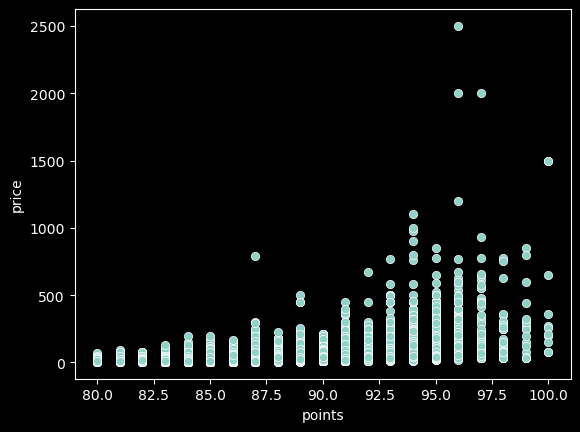

In [8]:
sns.scatterplot(df, x='points', y='price');

# Feature engineering

## Numeric features

Feature scaling

In [10]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing

df = pd.DataFrame({
    'beta': np.random.beta(5, 1, 1000) * 60,
    'exponential': np.random.exponential(10, 1000),
    'normal_p': np.random.normal(10, 2, 1000),
    'normal_l': np.random.normal(10, 10, 1000),
    })

df.head()

,beta,exponential,normal_p,normal_l
0,57.700610,9.743022,12.994293,4.386136
1,42.299963,13.298474,10.831744,15.966472
2,46.665766,4.875578,8.361127,9.150289
3,53.366241,22.347541,10.290209,16.307505
4,43.346634,7.762950,8.815210,4.905548


In [21]:
# For cleaned feature [range 0-1]
col_names = list(df.columns)
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)
df_mm = pd.DataFrame(df_mm, columns=col_names)
df_mm.head()

,beta,exponential,normal_p,normal_l
0,0.954074,0.114353,0.694550,0.365208
1,0.645956,0.156110,0.533891,0.540712
2,0.733302,0.057188,0.350345,0.437411
3,0.867357,0.262387,0.493659,0.545881
4,0.666897,0.091099,0.384079,0.373080


In [23]:
# For NOT cleaned feature with outliers
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)
df_r = pd.DataFrame(df_r, columns=col_names)
df_r.head()

,beta,exponential,normal_p,normal_l
0,0.461927,0.277821,1.048962,-0.388481
1,-0.906118,0.623949,0.266667,0.448681
2,-0.518302,-0.196032,-0.627070,-0.044072
3,0.076903,1.504889,0.070768,0.473335
4,-0.813142,0.085058,-0.462808,-0.350932


In [24]:
# For Gaussian distributed features
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l
0,0.905539,-0.007654,1.438603,-0.533628
1,-0.922984,0.347255,0.389630,0.622900
2,-0.404631,-0.493527,-0.808776,-0.057832
3,0.390918,1.250543,0.126951,0.656959
4,-0.798712,-0.205306,-0.588517,-0.481754


## Datetime features

[Encode cyclical features](https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning):

$x_{\sin}=\sin(\frac{2*\pi*x}{max(x)})$

$x_{\cos}=\cos(\frac{2*\pi*x}{max(x)})$

In [ ]:
def get_cyclic_encoding(
    df: pd.DataFrame, feature: str) -> pd.DataFrame:
    """Cyclic encoding

    Args:
        df (pd.DataFrame): The input DataFrame
        feature (str): The feature to be encoded

    Returns:
        pd.DataFrame: The input DF with new encoded features
    """
    x = df[feature]
    sin_x = np.sin((2 * np.pi * x.dt.dayofyear) / x.dt.dayofyear.max())
    cos_x = np.cos((2 * np.pi * x.dt.dayofyear) / x.dt.dayofyear.max())
    df[feature + '_sin_x'] = sin_x
    df[feature + '_cos_x'] = cos_x
    return df

Getting rid of dates

In [27]:
import pandas as pd

calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
    ]


calls = pd.DataFrame(calls_list, columns=['client_id',  'agent_date', 'created_at', 'end_date'])
calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])
display(calls.head())

calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls = calls.drop(['client_id', 'agent_date', 'created_at', 'end_date'], axis=1)
calls.head()

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03


,duration,time_connection,is_connection,time_diff
0,1,5,0,6
1,231,2,1,233
2,104,0,1,104
3,2,7,0,9
4,215,1,1,216


## Categorical features

In [36]:
import pandas as pd

clothing_list = [
    ['xxs', 'dress'], ['xxs', 'skirt'], ['xs', 'dress'],
    ['s', 'skirt'], ['m', 'dress'], ['l', 'shirt'],
    ['s', 'coat'], ['m', 'coat'], ['xxl', 'shirt'],
    ['l', 'dress']
    ]
clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [37]:
# Ordinal encoding
import category_encoders as ce

ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing['size'])
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [38]:
# One-hot encoding
onehot_encoder = ce.OneHotEncoder(cols='type', use_cat_names=True)
clothing_encoded = onehot_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, clothing_encoded], axis=1)
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [39]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'], )
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,0,1,0,0
1,xxs,1,0,1,0,0,0,0,0,1
2,xs,2,1,0,0,0,0,1,0,0
3,s,3,0,1,0,0,0,0,0,1
4,m,4,1,0,0,0,0,1,0,0
5,l,5,0,0,1,0,0,0,1,0
6,s,3,0,0,0,1,1,0,0,0
7,m,4,0,0,0,1,1,0,0,0
8,xxl,6,0,0,1,0,0,0,1,0
9,l,5,1,0,0,0,0,1,0,0


In [40]:
# Binary encoding (more than 15 values)
bin_encoder = ce.BinaryEncoder(cols=['type'])
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1
